# Mini Project : Sentiment analysis

**In this notebook**, I present the processing steps applied to the movie reviews dataset. The goal is to identify and filter out reviews with mixed sentiments in order to more accurately evaluate the performance of our sentiment analysis algorithm. Several useful functions used throughout this notebook are defined in the accompanying files.

### Set up ###

In [59]:
from a_load import extract_dataset, clean_text, load_dataset
from b_model import train_sentiment_model
from c_mix_review import find_mixed_reviews
from d_visualisation import visualize_mixed_review

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
tar_path = 'aclImdb_v1.tar.gz'
extract_path = '.'

# Extraire le dataset si nécessaire
if not os.path.exists(os.path.join(extract_path, 'aclImdb')):
    extract_dataset(tar_path, extract_path)

# Définir les chemins
train_path = os.path.join(extract_path, 'aclImdb', 'train')
test_path = os.path.join(extract_path, 'aclImdb', 'test')

print("Chargement des données d'entraînement...")
train_df = load_dataset(train_path)
print("Chargement des données de test...")
test_df = load_dataset(test_path)

print(f"Forme des données d'entraînement: {train_df.shape}")
print(f"Forme des données de test: {test_df.shape}")

Chargement des données d'entraînement...
Chargement des données de test...
Forme des données d'entraînement: (25000, 2)
Forme des données de test: (25000, 2)


## I/ Training ##

In [61]:
# Entraîner le modèle de sentiment
vectorizer, classifier = train_sentiment_model(train_df)

# Trouver les critiques mitigées
print("\nRecherche des critiques mitigées...")
mixed_indices, mixed_details = find_mixed_reviews(test_df, vectorizer, classifier)
print(f"\nPourcentage de critiques mitigées trouvées: {len(mixed_indices)/len(test_df)*100:.2f}%")
print(f"Exemple de critique mitigée : {mixed_details[10]['review']}")

Nettoyage des données textuelles...
Extraction de caractéristiques avec TF-IDF...
Entraînement du modèle de régression logistique...

Recherche des critiques mitigées...

Pourcentage de critiques mitigées trouvées: 14.39%
Exemple de critique mitigée : The idea is not original... If you have seen such kind of story before, you would know what the ending would come out after watching for the first twenty minutes... the script, the positioning of the actors and the screening is too obvious... If you haven't seen such story before, it is definitely a good experience, you will enjoy the twist at the end...don't forget to watch it again after you know the "truth", you will even more enjoy the plots... Even though I have a right guess at the very beginning, I still couldn't help stick on my seat till the end...<br /><br />Conclusion: A must see!! This one from Korea is better than any recent movies of the genre from Japan...forget Hollywood!<br /><br />Don't miss it!!


In [62]:
# Trouver les critiques non mitigées
non_mixed_indices = [i for i in range(len(test_df)) if i not in mixed_indices]
non_mixed_reviews_df = test_df.iloc[non_mixed_indices]

# Afficher un aperçu des critiques non mitigées
print("\nExemple de critique non-mitigée:")
print(non_mixed_reviews_df["review"][0])


Exemple de critique non-mitigée:
I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.


## II/ Visualisation


Exemples de critiques mitigées :

--- Critique mitigée #1 ---
Proportion positive: 0.60, Proportion négative: 0.40
Phrases positives: 3, Phrases négatives: 2

Phrases et leurs sentiments :
Phrase 1 (neutre, prob_pos=0.64): Even if you're a fan of Jean Rollin's idiosyncratic body of work, you will be caught off guard by th...
Phrase 2 (négatif, prob_pos=0.26): For once, there's not a single diaphanously gowned vampire girl in sight !
Phrase 3 (neutre, prob_pos=0.69): True to tradition, the budget proved way too tight to realize the director's vision entirely.
Phrase 4 (positif, prob_pos=0.70): Yet this is largely compensated by his obvious love of genre cinema, dedication to his craft and she...
Phrase 5 (neutre, prob_pos=0.64): Jean-Claude Couty's atmospheric cinematography makes the most of the foreboding locations and Philip...
Phrase 6 (neutre, prob_pos=0.46): Playing Elisabeth (rather well, I might add), she's picked up wandering a nearby highway one night b...
Phrase 7 (neutre, p

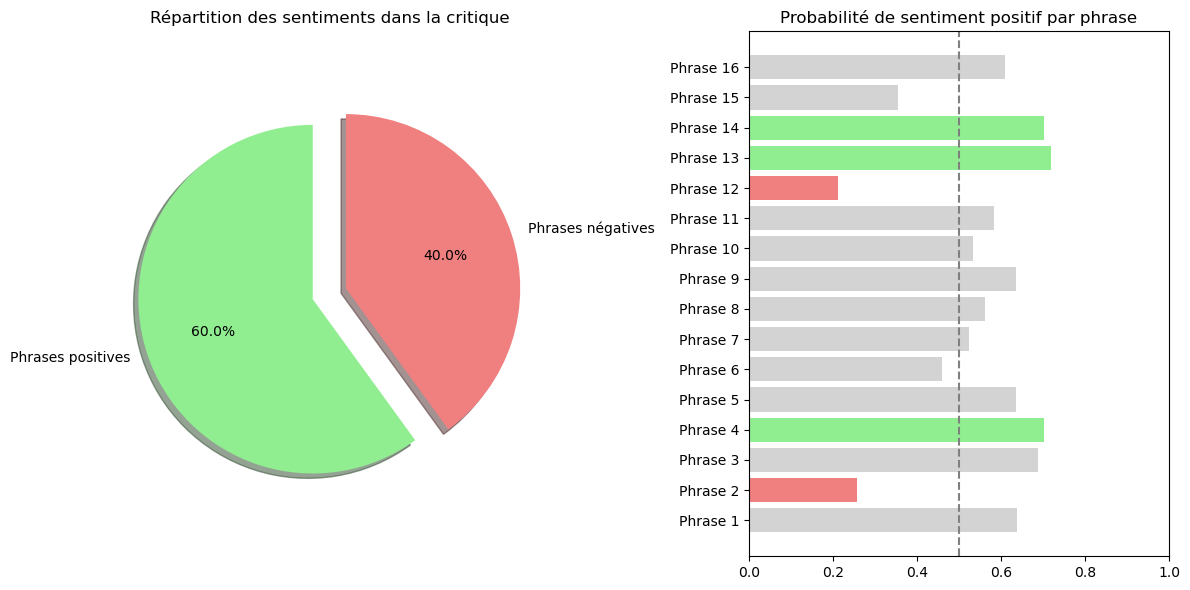


Critique complète:
Even if you're a fan of Jean Rollin's idiosyncratic body of work, you will be caught off guard by this exceptional foray into science fiction territory. For once, there's not a single diaphanously gowned vampire girl in sight ! True to tradition, the budget proved way too tight to realize the director's vision entirely. Yet this is largely compensated by his obvious love of genre cinema, dedication to his craft and sheer ingenuity. Jean-Claude Couty's atmospheric cinematography makes the most of the foreboding locations and Philippe Bréjean (a/k/a "Gary Sandeur") contributes a startling soundtrack that fortunately doesn't resemble any of the sappy stuff he composed for hardcore.<br /><br />Shot in and around a Paris office block before and after working hours, the film was largely cast with porn regulars Rollin was already quite familiar with from his "Michel Gentil" cash-gathering XXX efforts, most notably French f*ck film royalty Brigitte Lahaie in the demanding l

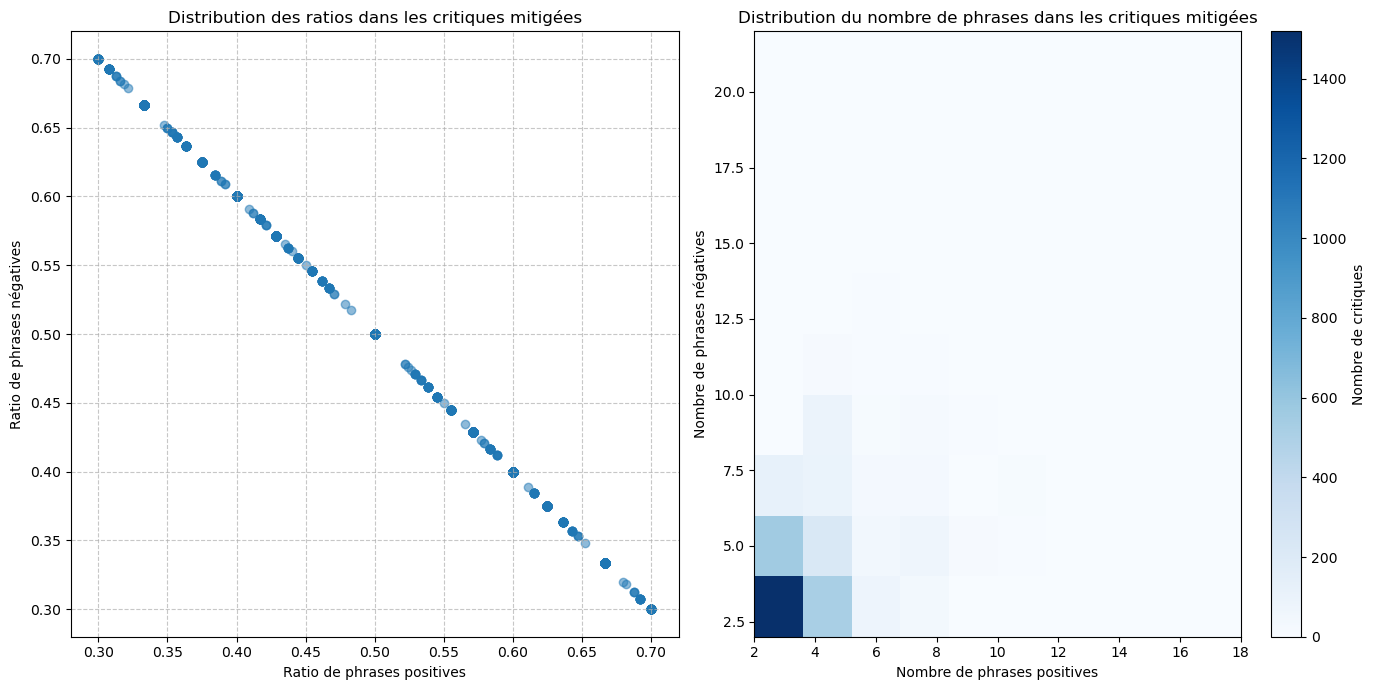

In [63]:
# Afficher quelques exemples de critiques mitigées
if mixed_details:
    print("\nExemples de critiques mitigées :")
    for i, review_detail in enumerate(mixed_details[:1]):  # Afficher les 5 premiers exemples
        print(f"\n--- Critique mitigée #{i+1} ---")
        print(f"Proportion positive: {review_detail['pos_ratio']:.2f}, Proportion négative: {review_detail['neg_ratio']:.2f}")
        print(f"Phrases positives: {review_detail['pos_count']}, Phrases négatives: {review_detail['neg_count']}")
        print("\nPhrases et leurs sentiments :")
        
        # Afficher les phrases avec leurs sentiments
        for j, (sentence, sentiment, prob) in enumerate(review_detail['sentences']):
            if len(sentence) > 100:  # Tronquer les phrases trop longues
                sentence = sentence[:100] + "..."
            print(f"Phrase {j+1} ({sentiment}, prob_pos={prob:.2f}): {sentence}")
        
        # Visualiser la répartition des sentiments
        visualize_mixed_review(review_detail)
        
        # Afficher la critique complète pour le premier exemple seulement
        if i == 0:
            print("\nCritique complète:")
            print(review_detail['review'])

    # Créer un DataFrame avec toutes les critiques mitigées
    mixed_reviews_df = pd.DataFrame({
        'index': mixed_indices,
        'review': [details['review'] for details in mixed_details],
        'pos_count': [details['pos_count'] for details in mixed_details],
        'neg_count': [details['neg_count'] for details in mixed_details],
        'pos_ratio': [details['pos_ratio'] for details in mixed_details],
        'neg_ratio': [details['neg_ratio'] for details in mixed_details]
    })

# Analyse des critiques mitigées
if not mixed_reviews_df.empty:
    plt.figure(figsize=(14, 7))
    
    # Distribution des ratios positifs/négatifs
    plt.subplot(1, 2, 1)
    plt.scatter(mixed_reviews_df['pos_ratio'], mixed_reviews_df['neg_ratio'], alpha=0.5)
    plt.xlabel('Ratio de phrases positives')
    plt.ylabel('Ratio de phrases négatives')
    plt.title('Distribution des ratios dans les critiques mitigées')
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Distribution du nombre de phrases positives vs négatives
    plt.subplot(1, 2, 2)
    plt.hist2d(mixed_reviews_df['pos_count'], mixed_reviews_df['neg_count'], 
                bins=10, cmap='Blues')
    plt.colorbar(label='Nombre de critiques')
    plt.xlabel('Nombre de phrases positives')
    plt.ylabel('Nombre de phrases négatives')
    plt.title('Distribution du nombre de phrases dans les critiques mitigées')
    
    plt.tight_layout()
    plt.show()

# if __name__ == "__main__":
#     main()

## III/ Performance on the non-mixed feelings reviews

Évaluation du modèle sur le dataset de test complet...

--- Dataset complet ---
Nombre d'échantillons: 25000
Précision (accuracy): 88.35%
Score F1: 88.35%
Précision: 88.35%
Rappel: 88.35%

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



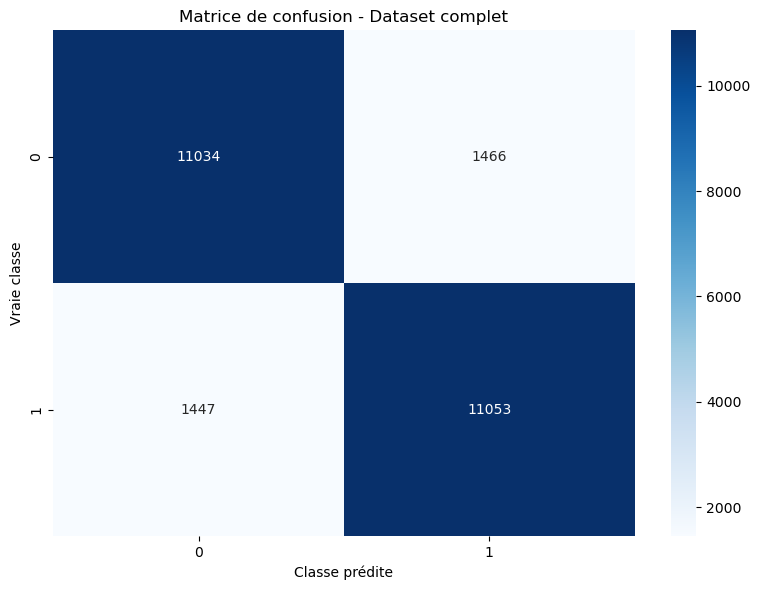


Évaluation du modèle sur le dataset sans critiques mitigées...


C:\Users\julie\AppData\Local\Temp\ipykernel_8388\3266692932.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_review'] = df['review'].apply(clean_text)



--- Dataset sans critiques mitigées ---
Nombre d'échantillons: 21402
Précision (accuracy): 90.71%
Score F1: 90.71%
Précision: 90.71%
Rappel: 90.71%

Rapport de classification:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     10488
           1       0.91      0.91      0.91     10914

    accuracy                           0.91     21402
   macro avg       0.91      0.91      0.91     21402
weighted avg       0.91      0.91      0.91     21402



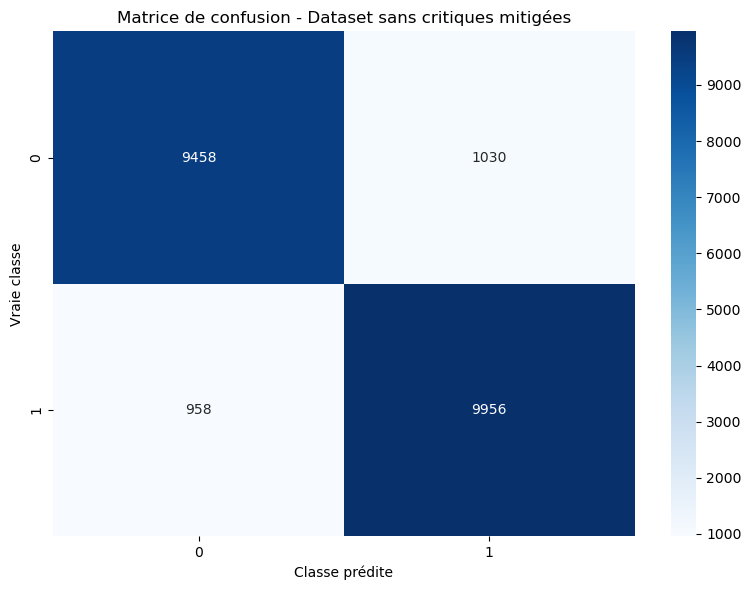


--- Comparaison des résultats ---
 Métrique  Dataset complet  Dataset sans critiques mitigées  Différence
 accuracy          88.3480                          90.7111      2.3631
       f1          88.3480                          90.7104      2.3624
precision          88.3481                          90.7117      2.3637
   recall          88.3480                          90.7111      2.3631


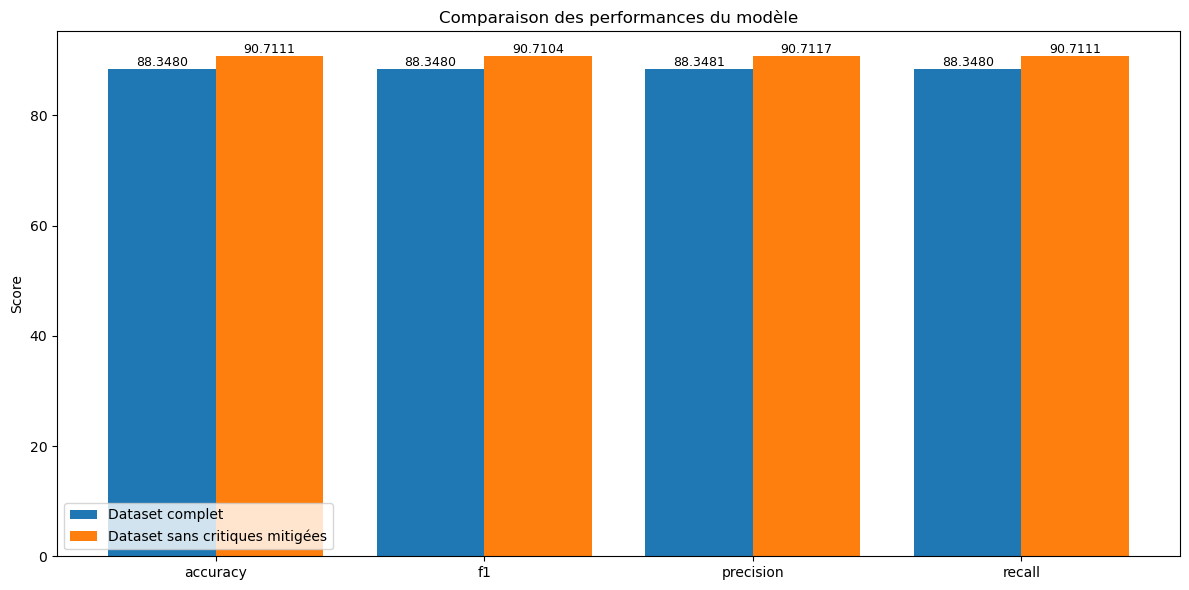

In [64]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def evaluate_model(model, vectorizer, df, title="Évaluation du modèle", verbose=True):
    """
    Évaluer le modèle de sentiment sur un DataFrame donné
    """
    # Nettoyer les données et préparer les features
    df['cleaned_review'] = df['review'].apply(clean_text)
    X = vectorizer.transform(df['cleaned_review'])
    y_true = df['sentiment']
    
    # Faire des prédictions
    y_pred = model.predict(X)
    
    # Calculer les métriques
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    
    # Convertir precision, recall et f1 en pourcentage pour cohérence avec accuracy
    precision *= 100
    recall *= 100
    f1 *= 100
    
    # Créer un rapport détaillé
    report = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Afficher les résultats
    print(f"\n--- {title} ---")
    print(f"Nombre d'échantillons: {len(df)}")
    print(f"Précision (accuracy): {accuracy:.2f}%")
    print(f"Score F1: {f1:.2f}%")
    print(f"Précision: {precision:.2f}%")
    print(f"Rappel: {recall:.2f}%")
    print("\nRapport de classification:")
    print(report)
    
    # Visualiser la matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Matrice de confusion - {title}')
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': conf_matrix
    }

# Évaluation sur le dataset complet
print("Évaluation du modèle sur le dataset de test complet...")
complete_results = evaluate_model(classifier, vectorizer, test_df, title="Dataset complet")

# Évaluation sur le dataset sans critiques mitigées
print("\nÉvaluation du modèle sur le dataset sans critiques mitigées...")
non_mixed_results = evaluate_model(classifier, vectorizer, non_mixed_reviews_df, title="Dataset sans critiques mitigées")

# Comparaison des résultats
print("\n--- Comparaison des résultats ---")
metrics = ['accuracy', 'f1', 'precision', 'recall']
comparison_data = []

for metric in metrics:
    comparison_data.append({
        'Métrique': metric,
        'Dataset complet': complete_results[metric],
        'Dataset sans critiques mitigées': non_mixed_results[metric],
        'Différence': non_mixed_results[metric] - complete_results[metric]
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Visualisation de la comparaison
plt.figure(figsize=(12, 6))
bars = plt.bar(
    x=np.arange(len(metrics)) - 0.2,
    height=[complete_results[m] for m in metrics],
    width=0.4,
    label='Dataset complet'
)

bars2 = plt.bar(
    x=np.arange(len(metrics)) + 0.2,
    height=[non_mixed_results[m] for m in metrics],
    width=0.4,
    label='Dataset sans critiques mitigées'
)

plt.xticks(np.arange(len(metrics)), metrics)
plt.ylabel('Score')
plt.title('Comparaison des performances du modèle')
plt.legend()

# Ajouter les valeurs sur les barres
for bar in bars + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()



--- Analyse spécifique des critiques mitigées ---

--- Analyse des erreurs sur le dataset complet ---
Nombre total d'erreurs: 2913 sur 25000 échantillons (11.65%)

Exemples d'erreurs (3):

Erreur 1:
Review: My wife is a mental health therapist and we watched it from beginning to end. I am the typical man and can not stand chick flicks, but this movie is unbelievable. If you want to see what it is like fo...
Vrai sentiment: 1
Sentiment prédit: 0

Erreur 2:
Review: I have certainly not seen all of Jean Rollin's films, but they mostly seem to be bloody vampire naked women fests, which if you like that sort of thing is not bad, but this is a major departure and co...
Vrai sentiment: 1
Sentiment prédit: 0

Erreur 3:
Review: While I can't say whether or not Larry Hama ever saw any of the old cartoons, I would think that writing said cartoons, file cards, and some of the comics would count for something.<br /><br />For fan...
Vrai sentiment: 1
Sentiment prédit: 0


C:\Users\julie\AppData\Local\Temp\ipykernel_8388\3266692932.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_review'] = df['review'].apply(clean_text)



--- Critiques mitigées uniquement ---
Nombre d'échantillons: 3598
Précision (accuracy): 74.29%
Score F1: 74.24%
Précision: 74.22%
Rappel: 74.29%

Rapport de classification:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2012
           1       0.72      0.69      0.70      1586

    accuracy                           0.74      3598
   macro avg       0.74      0.74      0.74      3598
weighted avg       0.74      0.74      0.74      3598



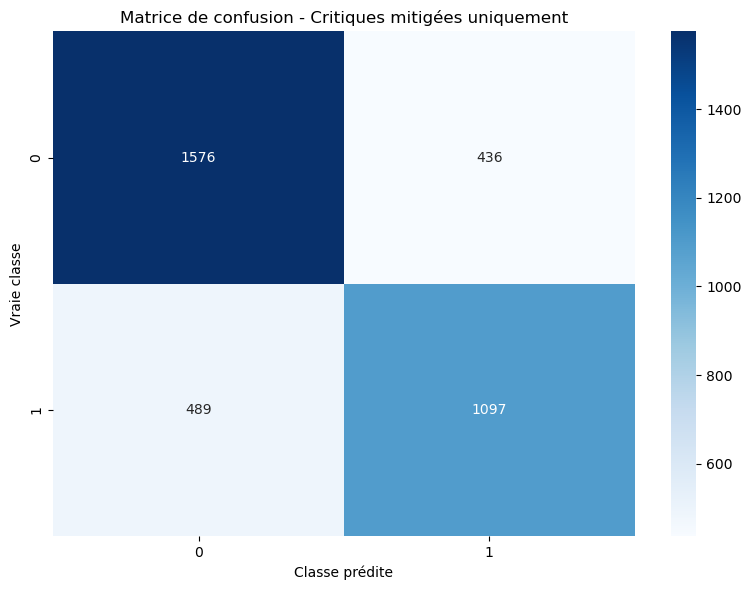


2. Performance sur les critiques mitigées:
  - Accuracy sur les critiques mitigées: 74.29%
  - Accuracy sur les critiques non-mitigées: 90.71%
  - Différence: 16.42%


In [65]:
# Fonction pour analyser les erreurs
def analyze_errors(df, model, vectorizer, n_examples=3):
    """Analyser les erreurs de prédiction du modèle"""
    df['cleaned_review'] = df['review'].apply(clean_text)
    X = vectorizer.transform(df['cleaned_review'])
    y_true = df['sentiment']
    
    # Faire des prédictions
    y_pred = model.predict(X)
    
    # Identifier les erreurs
    errors_idx = np.where(y_pred != y_true)[0]
    
    print(f"Nombre total d'erreurs: {len(errors_idx)} sur {len(df)} échantillons ({len(errors_idx)/len(df)*100:.2f}%)")
    
    if len(errors_idx) > 0:
        # Créer un DataFrame des erreurs
        error_df = df.iloc[errors_idx].copy()
        error_df['predicted'] = y_pred[errors_idx]
        
        # Afficher quelques exemples d'erreurs
        print(f"\nExemples d'erreurs ({min(n_examples, len(errors_idx))}):")
        for i, (idx, row) in enumerate(error_df.head(n_examples).iterrows()):
            print(f"\nErreur {i+1}:")
            print(f"Review: {row['review'][:200]}...")
            print(f"Vrai sentiment: {row['sentiment']}")
            print(f"Sentiment prédit: {row['predicted']}")
    
    return error_df if len(errors_idx) > 0 else None

# Ajouter une analyse pour voir si les critiques mitigées sont plus difficiles à classer correctement
print("\n--- Analyse spécifique des critiques mitigées ---")
mixed_reviews_df = test_df.iloc[mixed_indices]

# Analyse des erreurs sur le dataset complet
print("\n--- Analyse des erreurs sur le dataset complet ---")
df_errors = analyze_errors(test_df, classifier, vectorizer)

mixed_results = evaluate_model(classifier, vectorizer, mixed_reviews_df, title="Critiques mitigées uniquement")

# Analyse des prédictions sur les critiques mitigées
mixed_df = test_df.iloc[mixed_indices].copy()
mixed_df['cleaned_review'] = mixed_df['review'].apply(clean_text)
X_mixed = vectorizer.transform(mixed_df['cleaned_review'])
mixed_preds = classifier.predict(X_mixed)

mixed_correct = sum(mixed_preds == mixed_df['sentiment'])
mixed_accuracy = mixed_correct / len(mixed_df) * 100

print(f"\n2. Performance sur les critiques mitigées:")
print(f"  - Accuracy sur les critiques mitigées: {mixed_accuracy:.2f}%")
print(f"  - Accuracy sur les critiques non-mitigées: {non_mixed_results['accuracy']:.2f}%")
print(f"  - Différence: {non_mixed_results['accuracy'] - mixed_accuracy:.2f}%")

## Conclusion ##

Removing mixed reviews has a notable impact on the overall performance: the accuracy increases **by 2.36%** once these ambiguous cases are excluded. This suggests that mixed reviews are significantly harder for the sentiment analysis model to classify correctly.

When evaluating both groups separately, the model achieves an accuracy of 74.29% on mixed reviews, compared to 90.71% on clearly positive or negative reviews—a gap of 16.42%. **This highlights the challenge posed by nuanced sentiments and the importance of considering them when assessing model performance.**